In [2]:
import pyvista as pv
import numpy as np
pv.global_theme.notebook = False
print(np.__version__)
data = np.random.rand(10, 10, 10).astype(np.float32)

grid = pv.ImageData(dimensions=data.shape)
grid["values"] = data.flatten(order='F')

plotter = pv.Plotter()
plotter.add_volume(grid, scalars='values', cmap='gray')
plotter.show()

1.23.5


In [4]:
GPU_NUM = 0

GPU_NUM = str(GPU_NUM)
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=GPU_NUM

import gc
import cv2
import time
import h5py
import shutil
import natsort
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from copy import deepcopy
from IPython.display import clear_output
from matplotlib.colors import ListedColormap

import torch
import torch.nn as nn
plt.style.use(plt.style.available[-3])
pv.global_theme.notebook = False

In [7]:
from utils.utils import *
from utils.utils_recon import *

In [6]:
# plot_proj_total('Guhong_GL3')

In [14]:
n = 5
m = 2
epoch = 2000
list_model = ['Guhong_MoGLo',
              'Guhong_InFA', 
              'Others_Luo', 
              'Others_Qi', 
              'Others_DCL', 
              'Others_DC2', 
              'Others_CNN']
# plot_total(list_model, epoch=epoch, list_n=[5, 6, 7], list_m=[0, 1, 2, 3, 4, 5])
# plot_total(list_model, epoch, list_n=[n], list_m=[m], close=False)
imgs, list_p_acum = get_res(list_model, epoch, n, m, supress=True)
# imshow_hist(imgs[0], alpha=4)

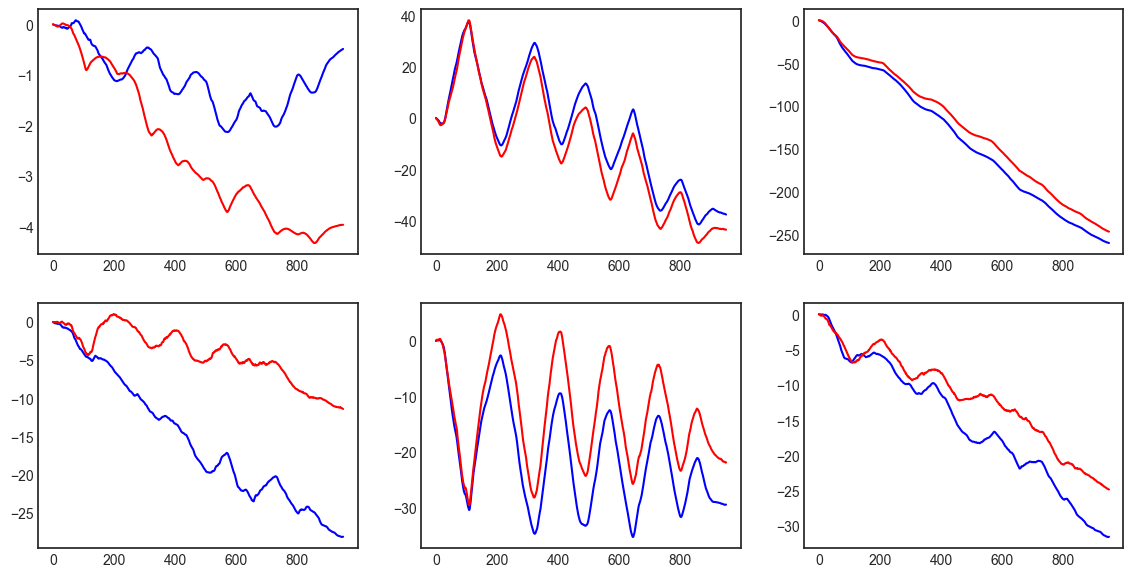

In [20]:
plt.figure(figsize=(14, 7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(list_p_acum[0][:, i], c='b')
    plt.plot(list_p_acum[1][:, i], c='r')

s:  torch.Size([128, 263, 480])
0.1965 s
tensor(255.)


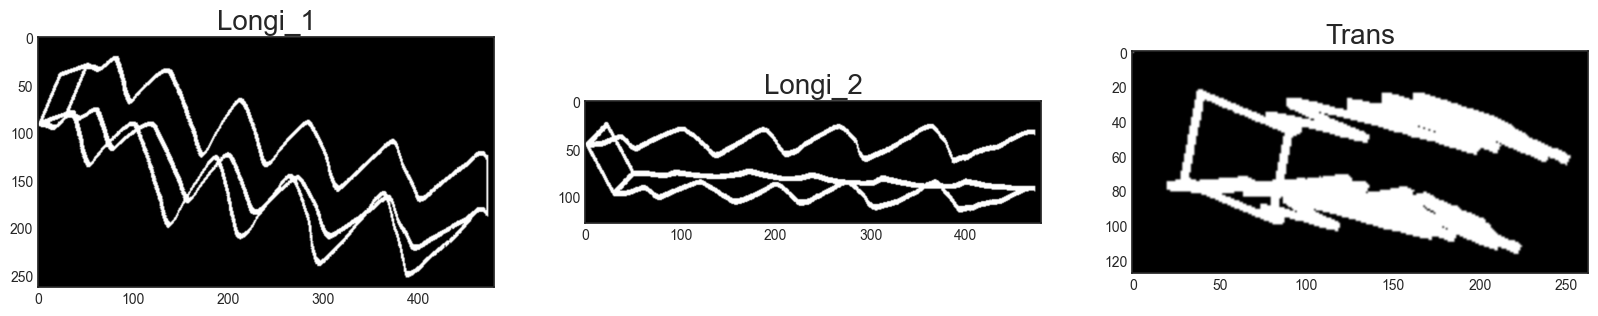

In [10]:
gc.collect()
t = time.time()
size = 256
size = 64
edge = int(size/64)
edge = 5
skip = 1
cut = 0.05
del_edge = [0]
# del_edge = [2]
s, scale = get_shape(list_p_acum, size)
print('s: ', s.shape)
scale = [scale['xm'], scale['ym'], scale['zm']]
# s = recon_3d(s, imgs, list_p_acum[-1], size, scale, cut=cut, edge=edge, c=249, skip=skip, floor=0, del_edge=[2, 3]) # GT

Do = 0
if Do:
    s = recon_3d(s, imgs, list_p_acum[-1], size, scale, cut=cut, edge=0, alpha=4, c=255, skip=skip, floor=0) # GT
    s = recon_3d(s, imgs, list_p_acum[+5], size, scale, cut=cut, edge=edge, c=249, skip=skip, floor=0, del_edge=[]) # CNN
    s = recon_3d(s, imgs, list_p_acum[+3], size, scale, cut=cut, edge=edge, c=252, skip=skip, floor=0, del_edge=del_edge) # DC2
    s = recon_3d(s, imgs, list_p_acum[+2], size, scale, cut=cut, edge=edge, c=254, skip=skip, floor=0, del_edge=del_edge) # Qi
    s = recon_3d(s, imgs, list_p_acum[+1], size, scale, cut=cut, edge=edge, c=253, skip=skip, floor=0, del_edge=del_edge) # Luo
s = recon_3d(s, imgs, list_p_acum[+0], size, scale, cut=cut, edge=edge, c=255, skip=skip, floor=0, del_edge=del_edge) # Ours
s[0, 0, -1] = 255
print(f'{time.time()-t:0.4f} s')
imshow_proj(s)
print(s.max())

In [11]:
view_vector = [-0.69811014, -0.31142174, -0.64471601]
viewup      = [-0.66158719,  0.62486272,  0.41454671]

In [13]:
view_vector, viewup = rendering(s, custom_cmap(base_cmap='binary_r', T=0), 1, view_vector=view_vector, viewup=viewup)

View Vector    : [ 0.27807298 -0.01061732 -0.96050127]
View Up Vector : [-0.39990219  0.90788211 -0.12581063]


In [13]:
cmap = custom_cmap(base_cmap='binary_r', T=0)
alpha = 1
view_vector, viewup = rendering(s, cmap, alpha, view_vector=view_vector, viewup=viewup)

AttributeError: 'ImageData' object has no attribute '_active_scalars_info'

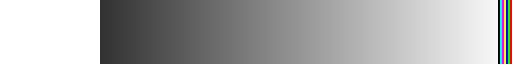

In [8]:
def custom_cmap(base_cmap='binary_r', T=0):
    cmap = plt.cm.get_cmap(base_cmap)
    cmap = cmap(np.arange(cmap.N))
    cmap[:T, -1] = 0
    cmap[-1] = np.array([1, 0, 0, 1]) # 빨강 255
    cmap[-2] = np.array([0, 1, 0, 1]) # 초록 254
    cmap[-3] = np.array([0, 0, 1, 1]) # 파랑 253
    cmap[-4] = np.array([1, 1, 0, 1]) # 노랑 252
    cmap[-5] = np.array([1, 0, 1, 1]) # 핑크 251
    cmap[-6] = np.array([0, 1, 1, 1]) # 하늘 250
    cmap[-7] = np.array([0, 0, 0, 1]) # 검정 249
    cmap = ListedColormap(cmap)
    
    return cmap

cmap = custom_cmap('gray', T=50)
cmap

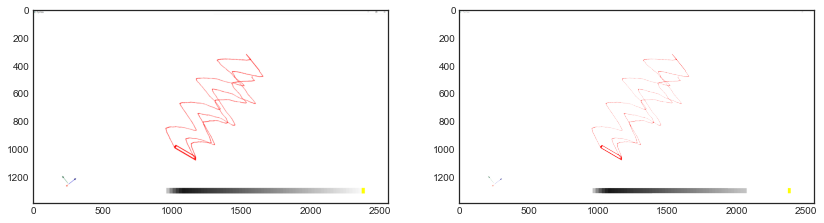

In [18]:
name = '5-3_2_E'

image1 = Image.open(f'C:/Users/amilab/Downloads/{name}.png').convert('RGBA')
image2 = Image.open(f'C:/Users/amilab/Downloads/{name}.png').convert('RGBA')

old = image1.getdata()
new = []
for item in old:
    if item[0]>=200 and item[1]>=200 and item[2]>=200: 
        new.append((255, 255, 255, 0))
    else:
        new.append(item)
image2.putdata(new)

images = [image1, image2]
plt.figure(figsize=(14, 7))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i])
    
image2.save(f'C:/Users/amilab/Downloads/{name[:-2]}_B.PNG', "PNG")